In [310]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum
import scipy
import pandas as pd
import numpy as np
import random
import os

In [311]:
model = LpProblem(name="profit-optimization", sense=LpMaximize)

In [312]:
# 读取Excel文件
df1 = pd.read_excel("./附件1(1).xlsx")
column_name_1 = '地块名称'
column_data_1 = df1[column_name_1].tolist()

df2 = pd.read_excel('./附件1(2).xlsx')
column_name_2 = '作物名称'
column_data_2 =df2[column_name_2].tolist()
column_data_1

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B9',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14',
 'E15',
 'E16',
 'F1',
 'F2',
 'F3',
 'F4']

In [313]:
years = [1,2,3,4,5,6,7]  # 2024到2030年
seasons = [1, 2]  # 两个种植季节
crops = list(range(1, 42))  # 41种作物
fields = list(range(1, 55))  # 54块地

In [314]:


# 定义决策变量，X[i][j][k] 表示第 i 作物在第 j 地块的第 k 季度种植面积
X = LpVariable.dicts("X", (crops, fields, seasons, years), lowBound=0, cat='Continuous')

In [315]:
df3 = pd.read_excel('./附件2(2)1.xlsx')

npyields = np.zeros((42,55,3))
npcosts = np.zeros((42,55,3))
# 遍历每一行并提取所需的列
for index, row in df3.iterrows():
    crop_id = row['作物编号']        # 提取作物编号
    plot_type = row['地块类型']      # 提取地块类型
    planting_season = row['种植季次']  # 提取种植季次
    yield_per_acre = row['亩产量/斤']  # 提取亩产量
    cost_per_acre = row['种植成本/(元/亩)']
    if plot_type == '平旱地':
        listtemp1=[1,2,3,4,5,6]
    elif plot_type == '梯田':
        listtemp1=[7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    elif plot_type == '山坡地':
        listtemp1=[21,22,23,24,25,26]
    elif plot_type == '水浇地':
        listtemp1=[27,28,29,30,31,32,33,34]
    elif plot_type == '普通大棚':
        listtemp1=[35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
    elif plot_type == '智慧大棚':
        listtemp1=[51,52,53,54]

    if planting_season=='单季' or planting_season=='第一季':
        ps=1
    else:
        ps=2
    for t in listtemp1:
        npyields[crop_id,t,ps]=yield_per_acre
        npcosts[crop_id,t,ps]=cost_per_acre
costs=npcosts.tolist()
yields=npyields.tolist()

In [316]:

df4 = pd.read_excel('./Ec.xlsx')

column_name_3 = '作物编号'
column_name_4 = '2023总产量'
column_data_3 = df4[column_name_3].tolist()
column_data_4 = df4[column_name_4].tolist()
npexpected_sales=np.zeros(42)
for i,j in zip(column_data_3,column_data_4):
    npexpected_sales[i]=j
expected_sales=npexpected_sales.tolist()

In [317]:


df5 = pd.read_excel('./updated_附件2(2)1.xlsx')
column_name_5 = '作物编号'
column_name_6 = '销售单价平均值/(元/斤)'
column_data_5 = df5[column_name_5].tolist()
column_data_5 = column_data_5[:-18]
column_data_6 = df5[column_name_6].tolist()
column_data_6 = column_data_6[:-18]
npprices=np.zeros(42)
for i,j in zip(column_data_5,column_data_6):
    npprices[i]=j
prices=npprices.tolist()

In [318]:
df6 = pd.read_excel('23年数据.xlsx')
# 提取各列数据
column_name_7 = '作物编号'
column_data_7 = df6[column_name_7].tolist()
column_name_8 = '种植地块'
column_data_8 = df6[column_name_8].tolist()
column_name_9 = '季节编号'
column_data_9 = df6[column_name_9].tolist()
column_name_10 = '种植面积/亩'
column_data_10 = df6[column_name_10].tolist()

# 创建一个嵌套字典来存储数据
data_dict = {}

# 遍历数据，填充字典
for num, plot, season, area in zip(column_data_7, column_data_8, column_data_9, column_data_10):
    if (num, plot) not in data_dict:
        data_dict[(num, plot)] = {}
    data_dict[(num, plot)][season] = area

# 将字典转换为列表
area23 = [list(data_dict[(num, plot)].items()) for num, plot in data_dict]

In [319]:
#亩产量的波动
#yields亩产量
#prices售价
#costs成本
#x亩数
def get_fluctuation_yield(yields,c,l,s):
    if c==6 or c==7 :
        yields[c][l][s] = yields[c][l][s]*(1+random.uniform(0.855, 0.21))
        return yields[c][l][s]
    else:
        yields[c][l][s] = yields[c][l][s]*(1+random.uniform(-0.855, 0.155))
        return yields[c][l][s]

def get_fluctuation_cost(costs,c,l,s):
    costs[c][l][s] = costs[c][l][s]*1.05
    return costs[c][l][s]
    
def get_fluctuation_prices(prices,c):
    if c<=37 and c>=17:
        prices[c]=prices[c]*1.05
    elif c<=40 and c>=38:
        prices[c]=prices[c]*(1+random.uniform(-0.05, -0.01))
    elif c==41:
        prices[c]=prices[c]*0.95
    return prices[c]
    

In [320]:
# 目标函数1: 滞销浪费情况下的利润最大化
model += lpSum([lpSum([0.8*lpSum([lpSum([get_fluctuation_yield(yields,c,l,s) * X[c][l][s][y] for l in fields]) for s in seasons])*get_fluctuation_prices(prices,c)-lpSum([lpSum([get_fluctuation_cost(costs,c,l,s) * X[c][l][s][y] for l in fields]) for s in seasons])for c in crops])for y in years])

In [321]:
data = pd.read_excel('./附件1(1).xlsx')
field_areas = data['地块面积/亩'].to_numpy()
field_areas = np.insert(field_areas, 0, 0)
field_areas

array([ 0. , 80. , 55. , 35. , 72. , 68. , 55. , 60. , 46. , 40. , 28. ,
       25. , 86. , 55. , 44. , 50. , 25. , 60. , 45. , 35. , 20. , 15. ,
       13. , 15. , 18. , 27. , 20. , 15. , 10. , 14. ,  6. , 10. , 12. ,
       22. , 20. ,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,
        0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6])

In [322]:
# 约束条件1: 作物种植面积不能超过地块总面积

for y in years:
    for s in seasons:
        for l in fields:
            model += lpSum([X[c][l][s][y] for c in crops]) <= field_areas[l]
            

# for y in years:
#         for c in crops:
#             model +=lpSum([lpSum([X[c][l][s][y]for s in seasons]) for l in fields]) <=260

for y in years:
        for c in crops:
            model += lpSum([lpSum([yields[c] [l][ s] * X[c][l][s][y] for l in fields]) for s in seasons])<=(1.2+0.2*y)*expected_sales[c]

In [323]:
# 约束条件2: 每个地块三年内至少种一次豆类作物
# beans1 = [1, 2, 3, 4, 5]
# for l in (1,27):
#     for y in years[:-2]:
#         model += lpSum([lpSum([X[bean][l][1][y + i] for i in range(0,3)])for bean in beans1])>=field_areas[l]
# beans2 = [16,17,18]
# for l in (27,42):
#     for y in years[:-2]:
#         model += lpSum([lpSum([lpSum([X[bean][l][s][y + i]for i in range(0,3)]) for bean in beans2]) for s in seasons])>=0.001

# # 约束条件2: 每个地块三年内至少种一次豆类作物
# beans = [1, 2, 3, 4, 5, 17, 18, 19] 
# for l in fields:
#     for s in seasons:
#         for y in years[:-2]:
#             model += lpSum([X[bean][l][s][y + i] for bean in beans for i in range(3)])>=field_areas[l]


beans = [1, 2, 3, 4, 5, 17, 18, 19]
for l in fields:
    model += lpSum([X[bean][l][s][y] for bean in beans for s in seasons for y in years if y in range(years[0], years[-1]+3)]) >= field_areas[l]

In [324]:
#约束条件4:种植面积不能太小
#定义B数组           
B = LpVariable.dicts("B", (crops, fields, seasons, years), cat = 'Binary')
# 
for c in crops:
    for l in fields:
        for s in seasons:
            for y in years:
                if X[c][l][s][y] >= 0.001:
                    B[c][l][s][y] = 1
                else:
                    B[c][l][s][y] = 0

for l in fields:
    for s in seasons:
        for y in years:
            model+= lpSum([X[c][l][s][y]*B[c][l][s][y] for c in crops])>=0.3

In [325]:
# 约束条件3: 分散性约束，某个作物不能在太多地块种植
# max_field_count = 6  # 每个作物每季最多种6个地块
# for y in years:
#     for s in seasons:
#         for c in crops:
#             model += lpSum([B[c][l][s][y] for l in fields]) <= max_field_count

In [326]:
# 约束条件5:轮作约束
# 对于平旱地
# for c in range(1,16):
#     for l in range(1,27):
#         for y in range(1,8):
#             model += X[c][l][1][y]*X[c][l][1][y+1] == 0
# #对于智慧大棚
# for c in range(1,16):
#     for l in range(51,55):
#         for y in range(1,8):
#             model += X[c][l][1][y]*X[c][l][1][y+1] +X[c][l][2][y]*X[c][l][2][y+1] == 0

# 约束条件5:轮作约束
# 对于平旱地
# for c in range(1,16):
#     for l in range(1,27):
#         for y in range(1,7):
#             model += X[c][l][1][y]+X[c][l][1][y+1] <= field_areas[l]
# # #对于智慧大棚
# for c in range(1,16):
#     for l in range(51,55):
#         for y in range(1,7):
#             model += X[c][l][1][y]+X[c][l][1][y+1] +X[c][l][2][y]+X[c][l][2][y+1] <=field_areas[l]

# 约束条件5:轮作约束
# 对于平旱地
for c in range(1,16):
    for l in range(1,27):
        for y in range(1,7):
            model += X[c][l][1][y]+X[c][l][1][y+1] <= field_areas[l]
# #对于智慧大棚
for c in range(17,35):
    for l in range(51,55):
        for y in range(1,7):
            model += X[c][l][1][y]+X[c][l][2][y+1]  <=field_areas[l]
            model+=  X[c][l][2][y]+X[c][l][1][y+1] <=field_areas[l]
            model+=  X[c][l][1][y]+X[c][l][1][y+1] <=field_areas[l]

In [327]:
# 种植类别约束
# 对于平旱地，梯田，山坡:
for c in range(1,16):
    for l in range(1,27):
            for y in years:
                model += X[c][l][ 2][ y] == 0 

for c in range(17,42):
     for l in range(1,27):
          for s in range(1,3):
            for y in years:
                model += X[c][l][ s][ y] == 0 

In [328]:

# 对于水浇地:
for l in range(27,35):
     for y in years:
          for c in range(1,17):
              model += X[c][l][ 1][ y]==0
          for c in range(35,42):
              model += X[c][l][ 1][ y]==0
          for c in range(1,35):
               model += X[c][l][ 2][ y]==0
          for c in range(38,42):
               model += X[c][l][ 2][ y]==0
#对于普通大棚类:
for l in range(35,51):
     for y in years:
          for c in range(1,17):
              model += X[c][l][1][y]==0
          for c in range(35,42):
              model += X[c][l][ 1][ y]==0
          for c in range(1,38):
              model += X[c][l][ 2][ y]==0
#对于智慧大棚类:
for l in range(51,55):
     for s in range(1,3):
        for y in years:
             for c in range(1,17):
                 model += X[c][l][ s][ y]==0
             for c in range(35,42):
                 model += X[c][l][ s][ y]==0 

In [329]:
# for l in range(0,55):
#     for s in range(0,3):
#         for y in range(0,8):
#             model += X[0][l][s][y]==0
# for c in range(0,42):
#     for s in range(0,3):
#         for y in range(0,8):
#             model += X[c][0][s][y]==0
# for l in range(0,55):
#     for c in range(0,42):
#         for y in range(0,8):
#             model += X[c][l][0][y]==0
# for l in range(0,55):
#     for s in range(0,3):
#         for c in range(0,42):
#             model += X[0][l][s][0]==0

In [330]:
Sum = np.zeros((42, 55, 3, 8))
for inter in range(1,101):
    model.solve()
    for c in crops:
        for l in fields:
            for s in seasons:
                for y in years:
                    Sum[c][l][s][y] += X[c][l][s][y].varValue
Sum = Sum/100
for c in crops:
    for l in fields:
        for s in seasons:
            for y in years:
                # 打印变量名称和求解后的值
                print(f"Sum[{c}][{l}][{s}][{y}] = {Sum[c][l][s][y]}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/maxdmx/anaconda3/envs/math/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/315e411168f24eea815190771efc546d-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/315e411168f24eea815190771efc546d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 28748 COLUMNS
At line 142183 RHS
At line 170927 BOUNDS
At line 170928 ENDATA
Problem MODEL has 28743 rows, 30996 columns and 106000 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3221 (-25522) rows, 3713 (-27283) columns and 13656 (-92344) elements
0  Obj 5437075.4 Primal inf 2356.4584 (250) Dual inf 55044489 (2326)
139  Obj 53538175 Primal inf 15919.992 (1360)
278  Obj 41144660 Primal inf 3314.6961 (1048)
417  Obj 37327668 Primal inf 534.35859 (493)
556  Obj 35929925 Primal inf 31.685639 (100)
629  Obj 35856268
Optimal - obje

In [331]:
# 假设 crops, fields, seasons, years 是已定义的作物、地块、季节和年份集合
for c in crops:
    for l in fields:
        for s in seasons:
            for y in years:
                # 打印变量名称和求解后的值
                print(f"X[{c}][{l}][{s}][{y}] = {X[c][l][s][y].varValue}")


X[1][1][1][1] = 0.0
X[1][1][1][2] = 0.0
X[1][1][1][3] = 0.0
X[1][1][1][4] = 0.0
X[1][1][1][5] = 0.0
X[1][1][1][6] = 0.0
X[1][1][1][7] = 0.0
X[1][1][2][1] = 0.0
X[1][1][2][2] = 0.0
X[1][1][2][3] = 0.0
X[1][1][2][4] = 0.0
X[1][1][2][5] = 0.0
X[1][1][2][6] = 0.0
X[1][1][2][7] = 0.0
X[1][2][1][1] = 0.0
X[1][2][1][2] = 0.0
X[1][2][1][3] = 0.0
X[1][2][1][4] = 0.0
X[1][2][1][5] = 5.9866573
X[1][2][1][6] = 21.075609
X[1][2][1][7] = 27.937734
X[1][2][2][1] = 0.0
X[1][2][2][2] = 0.0
X[1][2][2][3] = 0.0
X[1][2][2][4] = 0.0
X[1][2][2][5] = 0.0
X[1][2][2][6] = 0.0
X[1][2][2][7] = 0.0
X[1][3][1][1] = 0.0
X[1][3][1][2] = 0.0
X[1][3][1][3] = 0.0
X[1][3][1][4] = 0.0
X[1][3][1][5] = 0.0
X[1][3][1][6] = 0.0
X[1][3][1][7] = 0.0
X[1][3][2][1] = 0.0
X[1][3][2][2] = 0.0
X[1][3][2][3] = 0.0
X[1][3][2][4] = 0.0
X[1][3][2][5] = 0.0
X[1][3][2][6] = 0.0
X[1][3][2][7] = 0.0
X[1][4][1][1] = 0.0
X[1][4][1][2] = 0.0
X[1][4][1][3] = 0.0
X[1][4][1][4] = 0.0
X[1][4][1][5] = 0.0
X[1][4][1][6] = 0.0
X[1][4][1][7] = 0.0
X[

In [332]:
array_4d = [[[[0 for y in range(1,8)] for s in range(1,3)] for l in range(1,55)] for c in range(1,42)]
for c in crops:
    for l in fields:
        for s in seasons:
            for y in years:
                array_4d[c-1][l-1][s-1][y-1]= Sum[c][l][s][y]
array_4d = np.array(array_4d)

In [333]:
array_4d.shape

(41, 54, 2, 7)

In [334]:
arr_transposed = np.transpose(array_4d, (3, 2, 1, 0))
arr_transposed.size

30996

In [335]:
array_3d=arr_transposed[3,:,:,:]
array_2d=array_3d.reshape((54*2,41))
# 将 numpy 数组转换为 pandas DataFrame
df = pd.DataFrame(array_2d)

# 将 DataFrame 写入 Excel 文件的 sheet1
df.to_excel('output4.xlsx', sheet_name='Sheet1', index=False)    
print("数据已写入 Excel 文件")

数据已写入 Excel 文件


In [336]:
P=np.zeros((7))
for y in years:
    for c in crops:
        sales=0
        for s in seasons:
            for l in fields:
                # 计算每个作物的销售量和利润
                sales += 0.8*yields[c][l][s] * array_4d[c-1][l-1][s-1][y-1]
        Cost=0
        for s in seasons: 
            for l in fields:
                Cost+=costs[c][l][s]*array_4d[c-1][l-1][s-1][y-1]
        P[y-1] += sales * prices[c] - Cost
print(P)

[ 300381.61240588  463775.12393095 1102561.29638359 1424500.40225491
 1978902.06471121 2082151.19763353 2494734.5941485 ]


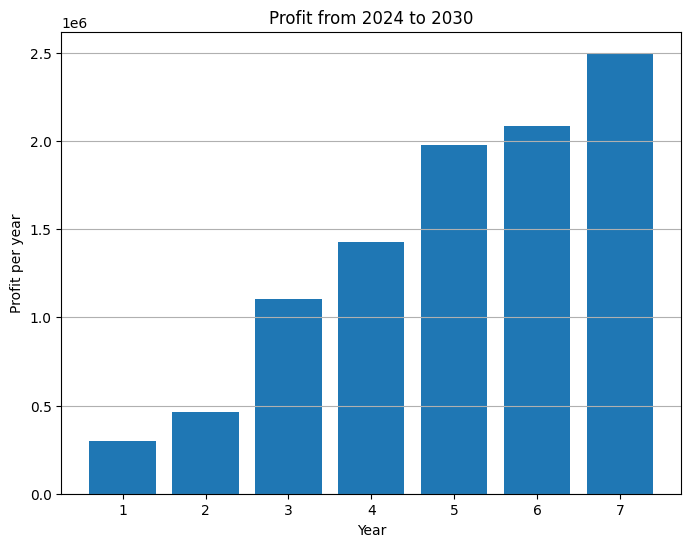

In [337]:
import numpy as np
import matplotlib.pyplot as plt
years1=[2024,2025,2026,2027,2028,2029,2030]
# Plotting a bar chart
plt.figure(figsize=(8, 6))
plt.bar(years, P)
plt.xlabel('Year')
plt.ylabel('Profit per year')
plt.title('Profit from 2024 to 2030')
plt.xticks(years)  # Ensure the x-axis shows each year
plt.grid(axis='y')

# Show the plot
plt.show()